In [12]:
import sys
import os
import pandas as pd
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [13]:
sys.path.insert(0, '../')
from scale_rl.common.wandb_utils import *

#### Collect Results

In [14]:
entity = 'draftrec'
project_name = 'Simba_2501'
run_exp_names_to_analysis_exp_names = {
    #'hypersimba_critic_width_128': 'simbaV2_cwidth128',
    #'hypersimba_critic_width_256': 'simbaV2_cwidth256',
    #'hypersimba_metrics':          'simbaV2_cwidth512',
    #'hypersimba_critic_width_1024':'simbaV2_cwidth1024',
    #'hypersimba_critic_width_2048':'hypersimba_cwidth2048',
    #'simba+_critic_width_128':     'simba_plus_cwidth128',
    #'simba+_critic_width_256':     'simba_plus_cwidth256',
    #'simba+_metrics':              'simba_plus_cwidth512',
    #'simba+_critic_width_1024':    'simba_plus_cwidth1024',
    #'simba+_critic_width_2048':    'simba_plus_cwidth2048',
    'simba_critic_width_128':  'simba_cwidth128',
    'simba_critic_width_256':  'simba_cwidth256',
    'simba_critic_width_1024': 'simba_cwidth1024',
}
run_exp_names = list(run_exp_names_to_analysis_exp_names.keys())
metrics = ['avg_return', 'avg_success']

In [7]:
entity = 'joonleesky'
project_name = 'simba'
run_exp_names_to_analysis_exp_names = {
    'sac_simba_actor_256_critic_128': 'simba_cwidth128',
    'sac_simba_actor_256_critic_256': 'simba_cwidth256',
    'sac_simba_actor_256_critic_512': 'simba_cwidth512',
    'sac_simba_actor_256_critic_1024':'simba_cwidth1024',
}
run_exp_names = list(run_exp_names_to_analysis_exp_names.keys())
metrics = ['avg_return', 'avg_success']

In [15]:
runs = collect_runs(entity=entity, project_name=project_name) 
filtered_runs = filter_runs(runs, exp_names = run_exp_names)
wandb_df = convert_runs_to_dataframe(
    runs = filtered_runs, 
    run_exp_name_to_analysis_exp_name=run_exp_names_to_analysis_exp_names
)
wandb_df = wandb_df[wandb_df.apply(lambda row: 'finished' in str(row['run']), axis=1)]
run_eval_df = convert_wandb_df_to_eval_df(wandb_df, metrics)
run_eval_df

100%|██████████| 75/75 [00:46<00:00,  1.60it/s]


,exp_name,env_name,seed,metric,env_step,value
0,simba_cwidth1024,h1-stair-v0,3000,avg_return,0.0,4.354505
1,simba_cwidth1024,h1-stair-v0,3000,avg_return,100000.0,35.791704
2,simba_cwidth1024,h1-stair-v0,3000,avg_return,200000.0,251.482043
3,simba_cwidth1024,h1-stair-v0,3000,avg_return,300000.0,338.661100
4,simba_cwidth1024,h1-stair-v0,3000,avg_return,400000.0,348.646446
...,...,...,...,...,...,...
1645,simba_cwidth128,h1-walk-v0,0,avg_success,600000.0,0.000000
1646,simba_cwidth128,h1-walk-v0,0,avg_success,700000.0,0.000000
1647,simba_cwidth128,h1-walk-v0,0,avg_success,800000.0,0.000000
1648,simba_cwidth128,h1-walk-v0,0,avg_success,900000.0,0.000000


In [19]:
save_eval_df(run_eval_df, directory_path='../results/scaling/param')

In [21]:
eval_df = read_and_concatenate_eval_df(directory_path='../results/scaling/param')
print(eval_df['exp_name'].unique())
eval_df

['simba_cwidth256' 'simbaV2_cwidth256' 'simba_plus_cwidth512'
 'simba_plus_cwidth256' 'simbaV2_cwidth512' 'simba_cwidth1024'
 'simbaV2_cwidth128' 'simba_cwidth128' 'simba_cwidth512'
 'simba_plus_cwidth1024' 'simbaV2_cwidth1024' 'simba_plus_cwidth128']


,exp_name,env_name,seed,metric,env_step,value
0,simba_cwidth256,h1-stair-v0,4000,avg_return,0.0,3.964905
1,simba_cwidth256,h1-stair-v0,4000,avg_return,100000.0,39.942952
2,simba_cwidth256,h1-stair-v0,4000,avg_return,200000.0,56.872002
3,simba_cwidth256,h1-stair-v0,4000,avg_return,300000.0,75.537309
4,simba_cwidth256,h1-stair-v0,4000,avg_return,400000.0,84.713004
...,...,...,...,...,...,...
51125,simba_plus_cwidth128,humanoid-stand,0,avg_success,600000.0,0.000000
51126,simba_plus_cwidth128,humanoid-stand,0,avg_success,700000.0,0.000000
51127,simba_plus_cwidth128,humanoid-stand,0,avg_success,800000.0,0.000000
51128,simba_plus_cwidth128,humanoid-stand,0,avg_success,900000.0,0.000000


#### Visualize Results

In [22]:
from rliable import library as rly
from rliable import metrics as rly_metrics
from rliable import plot_utils as rly_plot_utils

aggregate_func = lambda x: np.array([
  rly_metrics.aggregate_iqm(x),
  rly_metrics.aggregate_median(x),
  rly_metrics.aggregate_mean(x),
  rly_metrics.aggregate_optimality_gap(x)])

In [23]:
from scale_rl.envs.dmc import DMC_HARD
from scale_rl.envs.humanoid_bench import HB_LOCOMOTION_NOHAND_MINI, HB_RANDOM_SCORE, HB_SUCCESS_SCORE


In [24]:
def replace_hypen_to_underbar(env_name_list):
    for idx in range(len(env_name_list)):
        env_name_list[idx] = env_name_list[idx].replace('-', '_')
    return env_name_list

def replace_hyphen_in_dict_keys(old_dict):
    new_dict = {}
    for k, v in old_dict.items():
        new_key = k.replace('-', '_')  # <--- direct string replace
        new_dict[new_key] = v
    return new_dict

DMC_HARD = replace_hypen_to_underbar(DMC_HARD)
HB_LOCOMOTION = replace_hypen_to_underbar(HB_LOCOMOTION_NOHAND_MINI)

HB_RANDOM_SCORE = replace_hyphen_in_dict_keys(HB_RANDOM_SCORE)
HB_SUCCESS_SCORE = replace_hyphen_in_dict_keys(HB_SUCCESS_SCORE)
eval_df['env_name'] = eval_df['env_name'].str.replace('-', '_')
eval_df

,exp_name,env_name,seed,metric,env_step,value
0,simba_cwidth256,h1_stair_v0,4000,avg_return,0.0,3.964905
1,simba_cwidth256,h1_stair_v0,4000,avg_return,100000.0,39.942952
2,simba_cwidth256,h1_stair_v0,4000,avg_return,200000.0,56.872002
3,simba_cwidth256,h1_stair_v0,4000,avg_return,300000.0,75.537309
4,simba_cwidth256,h1_stair_v0,4000,avg_return,400000.0,84.713004
...,...,...,...,...,...,...
51125,simba_plus_cwidth128,humanoid_stand,0,avg_success,600000.0,0.000000
51126,simba_plus_cwidth128,humanoid_stand,0,avg_success,700000.0,0.000000
51127,simba_plus_cwidth128,humanoid_stand,0,avg_success,800000.0,0.000000
51128,simba_plus_cwidth128,humanoid_stand,0,avg_success,900000.0,0.000000


In [33]:
cur_exp_names = [
    'simba_cwidth256', 
    'simbaV2_cwidth256', 
    #'simba_plus_cwidth512',
    #'simba_plus_cwidth256', 
    'simbaV2_cwidth512', 
    'simba_cwidth1024',
    'simbaV2_cwidth128', 
    'simba_cwidth128', 
    'simba_cwidth512',
    #'simba_plus_cwidth1024', 
    'simbaV2_cwidth1024',
    #'simba_plus_cwidth128'',
]
#cur_exp_names = eval_df['exp_name'].unique()
cur_exp_names

['simba_cwidth256',
 'simbaV2_cwidth256',
 'simbaV2_cwidth512',
 'simba_cwidth1024',
 'simbaV2_cwidth128',
 'simba_cwidth128',
 'simba_cwidth512',
 'simbaV2_cwidth1024']

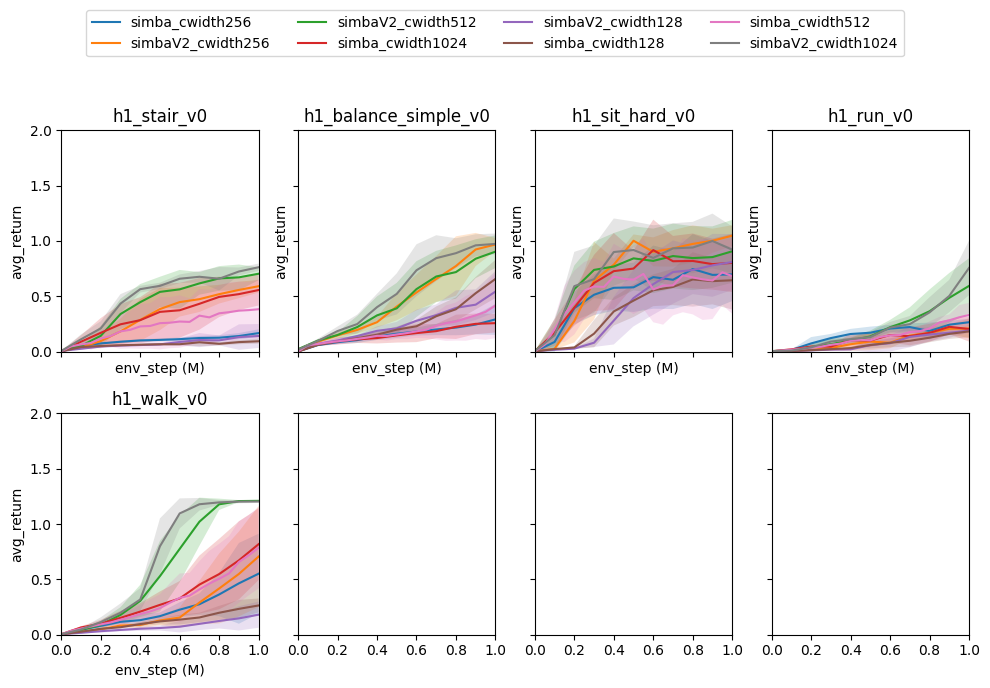

In [34]:
all_metric_mats = defaultdict(list)

for env_type in ["HB_LOCOMOTION"]:
    if env_type == "DMC_HARD":
        env_list = DMC_HARD
        env_step = 1e6
        metric_type = "avg_return"
        plot_height = 4
        y_lim_max = 1.1

    elif env_type == 'HB_LOCOMOTION':
        env_list = HB_LOCOMOTION
        env_step = 1e6
        metric_type = 'avg_return'
        plot_height=6 # 2.5
        y_lim_max=2.0

    # Filter eval_df for current environment set and experiments
    _eval_df = eval_df[eval_df["env_name"].isin(env_list)]
    _eval_df = _eval_df[_eval_df["exp_name"].isin(cur_exp_names)]

    if env_type in ["DMC_EM", "DMC_HARD"]:
        _eval_df.loc[:, "value"] /= 1000.0

    elif env_type == 'HB_LOCOMOTION':
        _eval_df = normalize_score_with_random_and_base_score(
            _eval_df, 
            HB_RANDOM_SCORE,
            HB_SUCCESS_SCORE,
        )

    # (Optional) plot metric history for each environment in this env_type
    plot_metric_history_per_env(
        _eval_df,
        num_plots_per_row=4,
        metric=metric_type,
        x_lim_max=env_step,
        y_lim_max=y_lim_max,
        plot_width=10,
        plot_height=plot_height,
        y_label=metric_type,
    )

    # Generate metric matrix dictionary for this env_type
    _metric_matrix_dict = generate_metric_matrix_dict(
        _eval_df, env_step=env_step, metric_type=metric_type
    )

    # Collect these matrices into all_metric_mats
    for exp_name, mat in _metric_matrix_dict.items():
        all_metric_mats[exp_name].append(mat)


In [35]:
metric_matrix_dict = {}
for exp_name, mats_list in all_metric_mats.items():
    # Find the minimum number of seeds among all matrices in mats_list
    min_num_seeds = min(mat.shape[1] for mat in mats_list)
    
    # Slice each matrix to keep only the first min_num_seeds columns
    mats_sliced = [mat[:, :min_num_seeds] for mat in mats_list]
    
    # Concatenate vertically
    # Resulting shape: [sum_of_envs_across_env_types, min_num_seeds]
    metric_matrix_dict[exp_name] = np.concatenate(mats_sliced, axis=0)

aggregate_scores = {}
aggregate_score_cis= {}

# Loop over each experiment (key) separately
for exp_name, mat in metric_matrix_dict.items():
    # We pass a small dict with just this experiment's data
    single_exp_dict = {exp_name: mat}
    
    # Compute interval estimates for only this experiment
    single_scores, single_cis = rly.get_interval_estimates(
        single_exp_dict,
        aggregate_func,  # e.g. rly.aggregate_iqm or custom
        reps=10000
    )
    
    # Store the result back into all_agg_scores, all_agg_cis
    # single_scores[exp_name] is something like [IQM, Median, Mean, Optimality Gap]
    aggregate_scores[exp_name] = single_scores[exp_name]
    aggregate_score_cis[exp_name] = single_cis[exp_name]

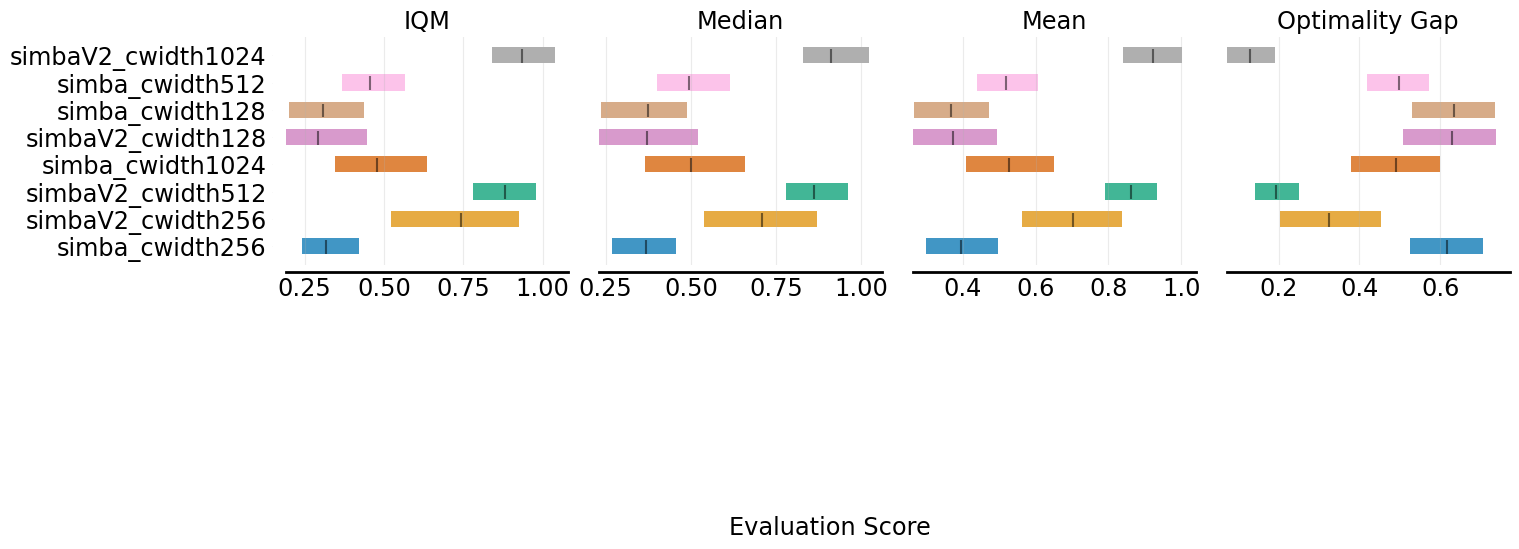

In [36]:
fig, axes = rly_plot_utils.plot_interval_estimates(
    aggregate_scores, aggregate_score_cis,
    metric_names=['IQM', 'Median', 'Mean', 'Optimality Gap'],
    algorithms=cur_exp_names,
    xlabel_y_coordinate=-0.8,
    xlabel='Evaluation Score',
)

In [37]:
for name in aggregate_scores.keys():
    score = aggregate_scores[name][2]
    lower = aggregate_score_cis[name][0][2]
    seeds = metric_matrix_dict[name].shape[1]
    print(seeds, name, round(score*100, 2), round((score-lower)*100, 2))

5 simba_cwidth256 39.4 9.62
5 simbaV2_cwidth256 70.39 14.14
10 simbaV2_cwidth512 86.29 7.3
5 simba_cwidth1024 52.69 11.81
5 simbaV2_cwidth128 37.22 10.96
5 simba_cwidth128 36.77 10.22
10 simba_cwidth512 51.92 8.14
5 simbaV2_cwidth1024 92.3 8.29
